In [1]:
import pandas as pd

# Load the baseline and SHAP output
baseline = pd.read_csv('./DEMO-xgboost-dm-1000-samples/clarify-explainability/explanations_shap/baseline.csv')
out = pd.read_csv('./DEMO-xgboost-dm-1000-samples/clarify-explainability/explanations_shap/out.csv')

# Check the contents
print("Baseline:")
print(baseline.head())

print("\nSHAP Output:")
print(out.head())

Baseline:
     CNTSCHID    CNTSTUID  SISCO  ST347Q01JA  ST347Q02JA  ST349Q01JA_0  \
0  17000028.0  17001050.0    1.0         5.0         1.0           0.0   

   ST349Q01JA_1  ST349Q01JA_2  ST349Q01JA_3  ST349Q01JA_4  ...  LANGN_912  \
0           1.0           0.0           0.0           0.0  ...        0.0   

   LANGN_913  LANGN_914  LANGN_916  LANGN_917  LANGN_918  LANGN_919  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   LANGN_920  LANGN_921  LANGN_922  
0        0.0        0.0        0.0  

[1 rows x 568 columns]

SHAP Output:
   CNTSCHID_label0  CNTSTUID_label0  SISCO_label0  ST347Q01JA_label0  \
0        -0.001485         0.001116      0.008425           0.000337   
1         0.014752         0.006669      0.000620           0.013431   
2         0.010710         0.010539     -0.000825           0.008553   
3         0.013434         0.028971      0.001813           0.001596   
4        -0.002936         0.008302     -0.006122           0.011102   

In [2]:
!pip install shap

  Using cached shap-0.46.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.46.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (540 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


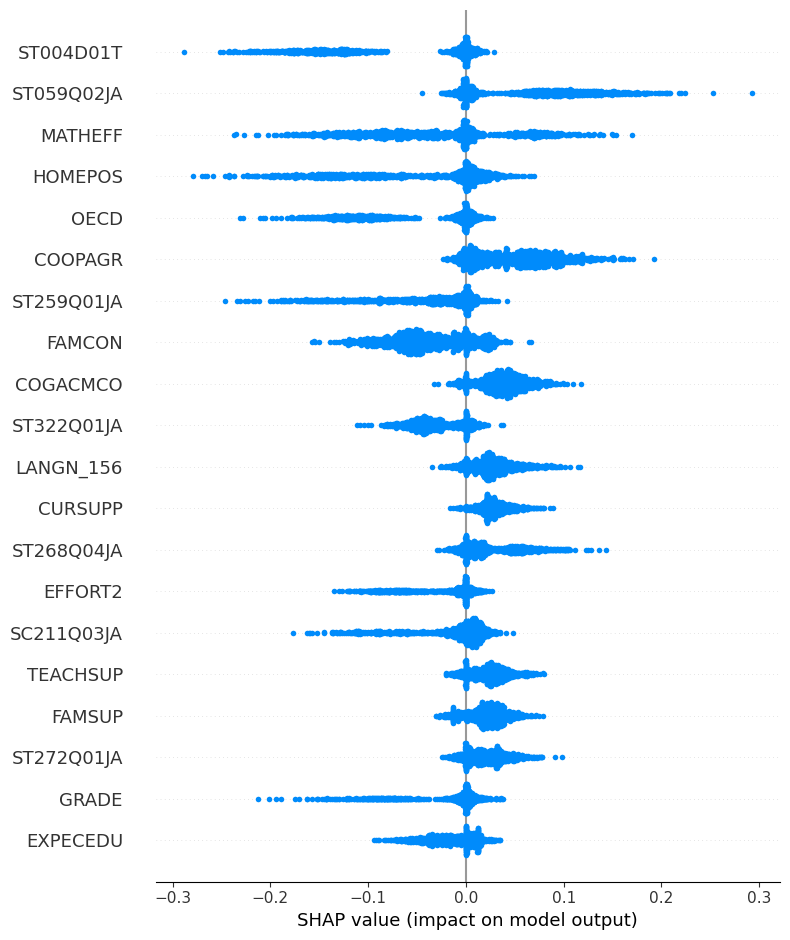

In [3]:
import shap
import matplotlib.pyplot as plt

# Strip '_label0' suffix from out.csv column names
feature_names = [col.replace('_label0', '') for col in out.columns]

# Extract SHAP values (1000 rows, one per sample)
shap_values = out.values  # This is now a 2D matrix with 1000 rows

# Extract baseline values (single row)
baseline_values = baseline.values.flatten()

# Create SHAP Explanation object
explainer = shap.Explanation(values=shap_values, base_values=baseline_values, feature_names=feature_names)

# Plot SHAP summary (beeswarm by default)
shap.summary_plot(explainer)

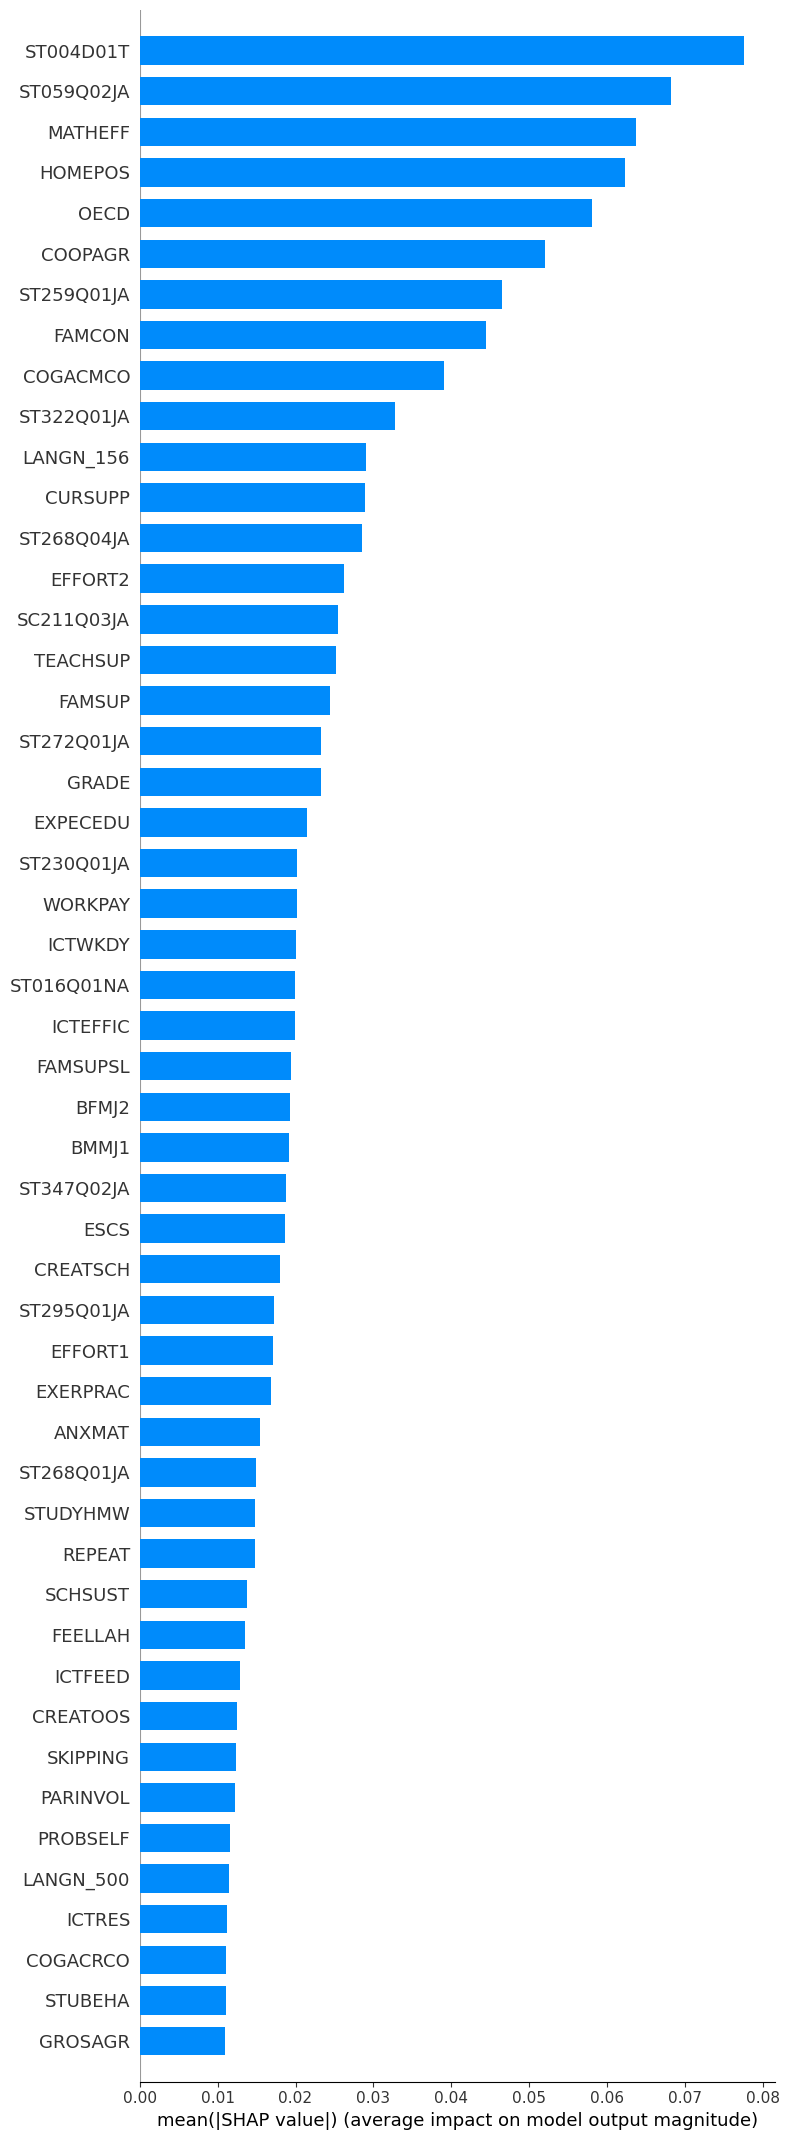

In [4]:
# Bar chart of top 15 features
shap.summary_plot(explainer, plot_type="bar", max_display=50)

SHAP Values Shape: (1001, 568)
Feature Data Shape: (1001, 568)


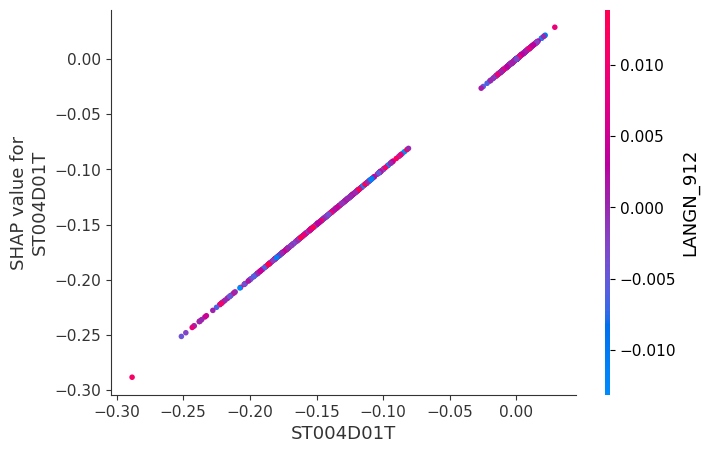

In [11]:
import pandas as pd

# Ensure feature names match
X_features = pd.DataFrame(out.values, columns=feature_names)

# Check shapes
print("SHAP Values Shape:", shap_values.shape)
print("Feature Data Shape:", X_features.shape)

# Get column index for GENDER
gender_index = feature_names.index("ST004D01T")  # Find GENDER column index

# Extract interaction values **manually**
shap_interactions = shap_values[:, gender_index]  # Interactions with GENDER

# 🔹 Plot SHAP interaction summary for GENDER
# shap.summary_plot(shap_interactions, feature_names)
# Plot interaction of GENDER (ST004D01T) with the most interacting variable
shap.dependence_plot("ST004D01T", shap_values, X_features, interaction_index="auto")
